In [63]:
from google.colab import drive
drive.mount('//content//drive')
path_data="//content//drive//MyDrive//Salaries.csv"


Drive already mounted at //content//drive; to attempt to forcibly remount, call drive.mount("//content//drive", force_remount=True).


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [64]:
data= pd.read_csv(path_data)
data.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [ ]:
Task 1: Basic Data Exploration.

In [30]:
data.count()

Id                  148654
EmployeeName        148654
JobTitle            148654
BasePay             148045
OvertimePay         148650
OtherPay            148650
Benefits            112491
TotalPay            148654
TotalPayBenefits    148654
Year                148654
Notes                    0
Agency              148654
Status                   0
dtype: int64

In [31]:
n_rows, n_col= data.shape
print('Number of rows: ', n_rows,"\nNumber of columns: ", n_col)

Number of rows:  148654 
Number of columns:  13


In [32]:
print('Data types of each column\n', data.dtypes)

Data types of each column
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [36]:
print('Number of missing values in each column:\n')
print(data.isnull().sum())

Number of missing values in each column:

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


Task 2: Descriptive Statistics.

In [65]:
data_des= data.drop(['Id','EmployeeName','Notes','Agency','Status'], axis=1)
data_des.describe()



,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


Task 3: Data Cleaning.

In [66]:
if(data['Agency'].nunique()==1):
  data= data.drop(['Agency'], axis=1)

In [67]:
data= data.drop(['Notes', 'Status'], axis=1)  #all of these are null
data= data.dropna(subset=['OvertimePay','OtherPay','BasePay']) # delete just the row which has a null value, because these columns have a little number of null value
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011


The correlation between 'TotalPay' and 'Year' is 0.8833918555584283


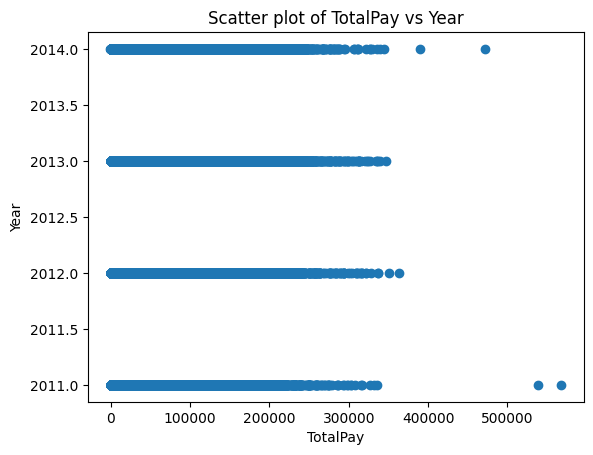

In [68]:
correlation = data['TotalPay'].corr(data['Benefits'])
print(f"The correlation between 'TotalPay' and 'Year' is {correlation}")

plt.scatter(data['TotalPay'], data['Year'])
plt.xlabel('TotalPay')
plt.ylabel('Year')
plt.title('Scatter plot of TotalPay vs Year')
plt.show()

The correlation between 'TotalPay' and 'Year' is 0.9180276868630514


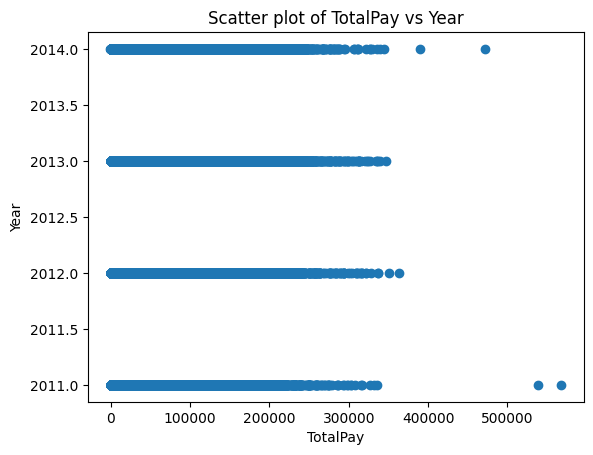

In [69]:
correlation = data['BasePay'].corr(data['Benefits'])
print(f"The correlation between 'TotalPay' and 'Year' is {correlation}")

plt.scatter(data['TotalPay'], data['Year'])
plt.xlabel('TotalPay')
plt.ylabel('Year')
plt.title('Scatter plot of TotalPay vs Year')
plt.show()

In [43]:
#using linear regression to predict the missing value of Benefits
from sklearn.linear_model import LinearRegression
train_data = data[data['Benefits'].notna()]
test_data = data[data['Benefits'].isna()]

X_train = train_data[['TotalPay', 'BasePay']]
y_train = train_data['Benefits']
X_test = test_data[['TotalPay', 'BasePay']]


model = LinearRegression()
model.fit(X_train, y_train)


test_data['Benefits'] = model.predict(X_test)


df = pd.concat([train_data, test_data])

<ipython-input-43-2f8ab46ef9e4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Benefits'] = model.predict(X_test)


In [44]:
predicted_values = model.predict(X_test)

data.loc[data['Benefits'].isna(), 'Benefits'] = predicted_values

In [45]:
data.head(10)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,66492.496344,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,62405.065675,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,74630.731058,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,34276.317613,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,51015.671999,326373.19,326373.19,2011
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,46059.903338,316285.74,316285.74,2011
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,38250.967314,315981.05,315981.05,2011
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,87092.624662,307899.46,307899.46,2011
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,63190.287419,303427.55,303427.55,2011
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,95535.420442,302377.73,302377.73,2011


Task 4: Basic Data Visualization.

In [48]:
# There is no department column, so i make one from jobtitle. I assume there are police, fire, and other departments.
def categorize_job(jobtitle):
    if 'fire' in jobtitle.lower():
        return 'Fire Department'
    elif 'police' in jobtitle.lower():
        return 'Police Department'
    else:
        return 'Other Department'


data['Department'] = data['JobTitle'].apply(categorize_job)

data.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,66492.496344,567595.43,567595.43,2011,Other Department
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,62405.065675,538909.28,538909.28,2011,Police Department
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,74630.731058,335279.91,335279.91,2011,Police Department
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,34276.317613,332343.61,332343.61,2011,Other Department
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,51015.671999,326373.19,326373.19,2011,Fire Department


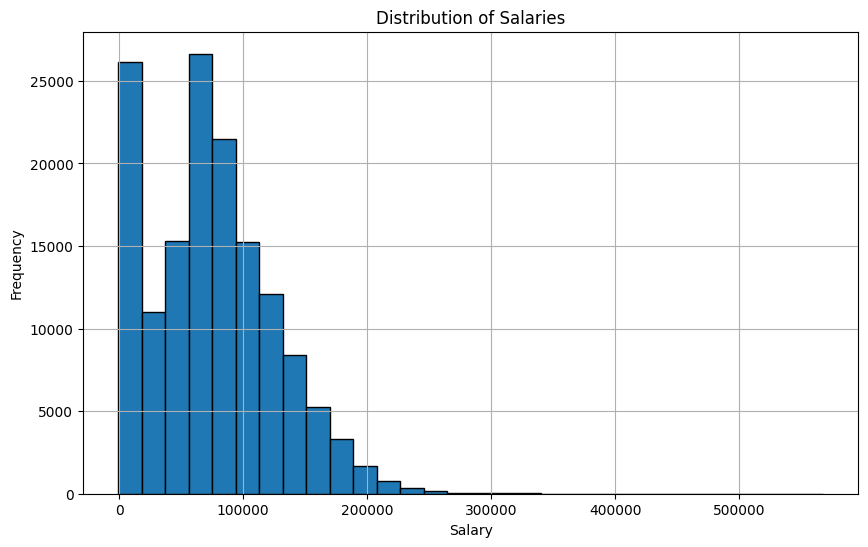

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=30, edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

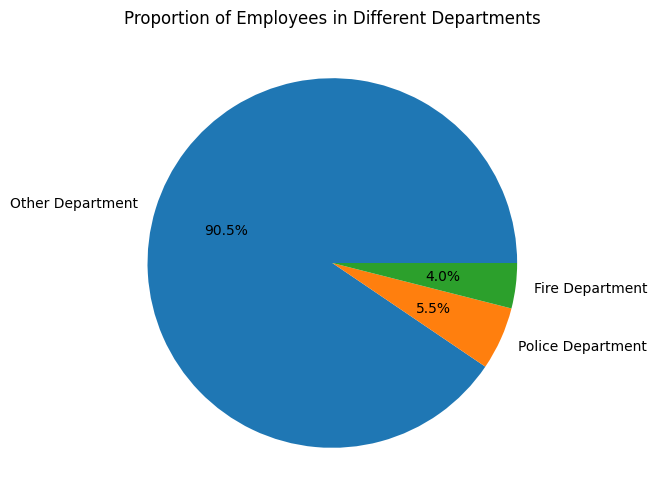

In [49]:
department_counts = data['Department'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(department_counts, labels=department_counts.index ,autopct='%1.1f%%')
plt.title('Proportion of Employees in Different Departments')
plt.show()

Task 5: Grouped Analysis.

In [71]:
grouped = data.groupby(['JobTitle', 'Year'])['TotalPay'].agg(['mean', 'sum', 'max', 'min'])
grouped_df = pd.DataFrame(grouped)
grouped_df = grouped_df.sort_values('Year')
grouped_df.head(10)

,,mean,sum,max,min
JobTitle,Year,,,,
ACCOUNT CLERK,2011,44035.664337,3654960.14,60838.20,614.00
MANAGER VI,2011,145775.222121,9621164.66,188059.39,22486.97
MANAGER V - MUNICIPAL TRANSPORTATION AGENCY,2011,118485.798000,1777286.97,139040.22,22931.35
MANAGER V,2011,120633.920238,10133249.30,170900.76,2344.50
MANAGER IV - MUNICIPAL TRANSPORTATION AGENCY,2011,118093.150500,2361863.01,129297.34,85952.72
MANAGER IV,2011,116501.993148,12582215.26,163960.28,0.00
MANAGER III - MUNICIPAL TRANSPORTATION AGENCY,2011,109135.371000,1091353.71,120908.54,96546.07
MANAGER III,2011,104891.634000,15733745.10,155401.72,3979.70
MANAGER II - MUNICIPAL TRANSPORTATION AGENCY,2011,104847.690000,838781.52,152539.32,62786.03


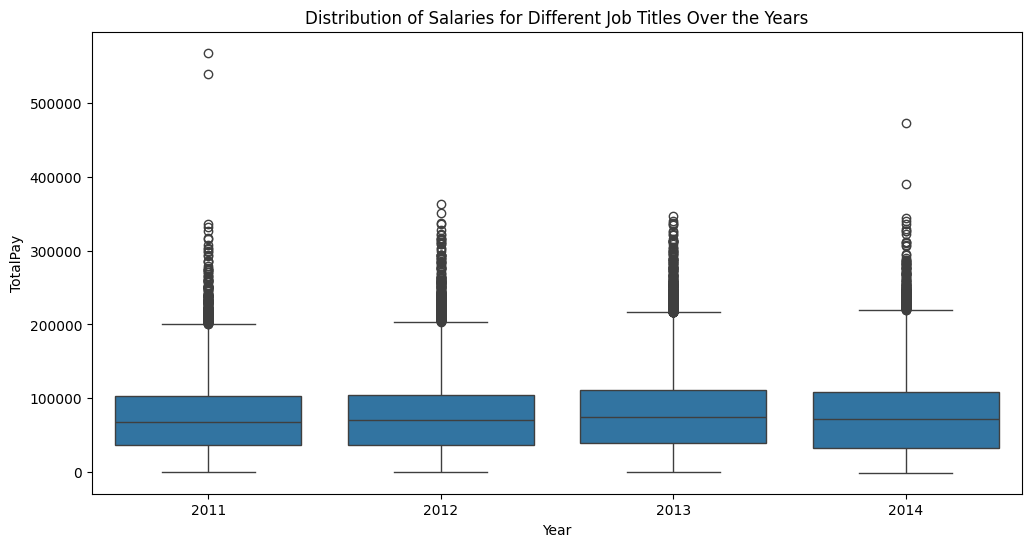

In [61]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='TotalPay', data=df)
plt.title('Distribution of Salaries for Different Job Titles Over the Years')
plt.xlabel('Year')
plt.ylabel('TotalPay')
plt.show()


Task 6: Simple Correlation Analysis.

The correlation between 'TotalPay' and 'BasePay' is 0.9544936474296023


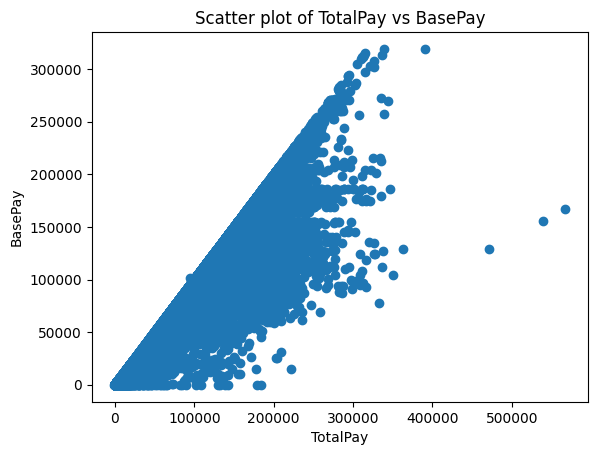

In [74]:
correlation = data['TotalPay'].corr(data['BasePay'])
print(f"The correlation between 'TotalPay' and 'BasePay' is {correlation}")

plt.scatter(data['TotalPay'], data['BasePay'])
plt.xlabel('TotalPay')
plt.ylabel('BasePay')
plt.title('Scatter plot of TotalPay vs BasePay')
plt.show()

Task 7: Summary of Insights

ملخص النتائج والرؤى
الاستكشاف الأولي للبيانات:
 تم التعرف على عدد الصفوف والأعمدة على الترتيب 148654، 13
تحديد انواع البيانات لكل عمود حيث تنوعت بين  int float ،object
التحقق من القيم المفقودة، وكان هناك عمودان جميع القيم لديهما مفقودة، وعودان فقط 4 قيم مفقودة، وعمود 609 قيم مفقودة، وعمود آخر لديه 36163 قيمة مفقودة.
الإحصاءات الوظيفية:
تم حساب الإحصاءات الأساسية مثل المتوسط الحسابي، الحد الأدنى والأقصى لكل الأعمدة ما عدا 'Id','EmployeeName','Notes','Agency','Status'
تنظيف البيانات:
تم حذف كلا من 'Notes', 'Status' وذلك كون جميع القيم مفقودة، وحذف Agency لأن القيم موجدة لجميع الأسطر.
حذف السطر الذي يحوي على القيمة المفقودة في كلا من 'OvertimePay','OtherPay','BasePay' وذلك لأن عدد القيم المفقودة قليل ولن يؤثر على الداتاسيت.
أما بالنسبة لعمود Benefits فقد تم استخدام الانحدار الخطي للتنبؤ بالقيم المفقودة لأن عددها كبير. بالاستعانة مع عمودي BasePay و Totalpay بعد ظهور ترابط قوي بينهما وبين Benefits.
التصوير البياني الأساسي:
استخدام الهيستوغرام لتصوير توزيع الرواتب، و Pie chart لتمثيل نسبة الموظفين في الأقسام المختلفة.
وقد تبين من توزيع الرواتب أنها أكثرها تكرارا كانت أقل من 100000 ، وأن معظم الموظفين كانوا من غير قسمي Police و Fire.
التحليل التجميعي:
تم جمع البيانات حسب عمودي السنة والمسمى الوظيفي وحساب الإحصائيات لكل  مجموعة ومقارنة متوسط الرواتب للمجموعات المختلفة باستخدام boxplot.
التحليل الارتباطي البسيط:
اخترت BasePay لإظهر الترابط بينها وبين  TotalPay وتبين أن العلاقة بينهما علاقة خطية حيث بلغت قيمة الترابط 0.9544